In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score


In [115]:
# Load the excel file(s) 
df = pd.read_excel('miles50_coventry.xlsx')

In [116]:
df.head()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524


In [117]:
# Create new DF with relevant details 
df1 = df[['outward_code_x','distance', 'Courier', 'DeliveryCost', 'Weight_per_line',
         'Volume_per_line_m3', 'Pallet_per_line', 'OrderDate']].copy()

In [118]:
# Check dates are correctly formatted 
df1.dtypes

outward_code_x                object
distance                     float64
Courier                       object
DeliveryCost                 float64
Weight_per_line              float64
Volume_per_line_m3           float64
Pallet_per_line              float64
OrderDate             datetime64[ns]
dtype: object

In [119]:
# Update Dateformat 
df1['OrderDate'] = pd.to_datetime(df1['OrderDate']) 
df1['OrderDate'] = df1['OrderDate'].dt.strftime('%d/%m/%Y')


In [120]:
df1.head(5)

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023
1,OX18,43.04,DX Freight,14.77,29.24,0.219678,0.200025,16/04/2023
2,CV5,2.34,DX Freight,14.45,28.50,0.044060,0.044323,05/04/2023
3,WS15,29.80,DX Express,6.76,8.56,0.053674,0.028439,20/04/2023
4,MK1,44.21,DX Freight,22.28,48.74,0.090629,0.059524,31/03/2023


In [121]:
# Reading the Excel file of coordinate information into a Pandas DataFrame
long_lat = pd.read_csv('UK-Postcodes.csv')

# Viewing the DataFrame
long_lat.head()

,id,outcode,latitude,longitude
0,1,AB10,57.131086,-2.122482
1,2,AB11,57.131210,-2.082261
2,3,AB12,57.098381,-2.172400
3,4,AB13,57.108000,-2.237000
4,5,AB14,57.101000,-2.270000


In [122]:
# Merging the long-lat and customers_cleaned DataFrames into a new one
# Carrying out a left join to get a latitude and longitiude for each of our postcodes
df2 = pd.merge(df1, long_lat, 
                    left_on = 'outward_code_x',
                    right_on = 'outcode',
                    how = 'left')

In [123]:
df2.head()

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,id,outcode,latitude,longitude
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023,766,DY6,52.496759,-2.173682
1,OX18,43.04,DX Freight,14.77,29.24,0.219678,0.200025,16/04/2023,1934,OX18,51.767526,-1.582311
2,CV5,2.34,DX Freight,14.45,28.50,0.044060,0.044323,05/04/2023,597,CV5,52.424186,-1.562449
3,WS15,29.80,DX Express,6.76,8.56,0.053674,0.028439,20/04/2023,2915,WS15,52.765303,-1.911238
4,MK1,44.21,DX Freight,22.28,48.74,0.090629,0.059524,31/03/2023,1664,MK1,52.006042,-0.726102


In [124]:
# Remove rows where the longitude and Latitude are null values

df2.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [125]:
# Variable with the Longitude and Latitude
X=df2.loc[:,['id','latitude','longitude']]
X.head(10)

,id,latitude,longitude
0,766,52.496759,-2.173682
1,1934,51.767526,-1.582311
2,597,52.424186,-1.562449
3,2915,52.765303,-1.911238
4,1664,52.006042,-0.726102
5,1820,52.964498,-1.213406
6,1029,51.880284,-1.875728
7,1029,51.880284,-1.875728
8,1473,52.677164,-1.020786
9,584,52.347041,-1.366452


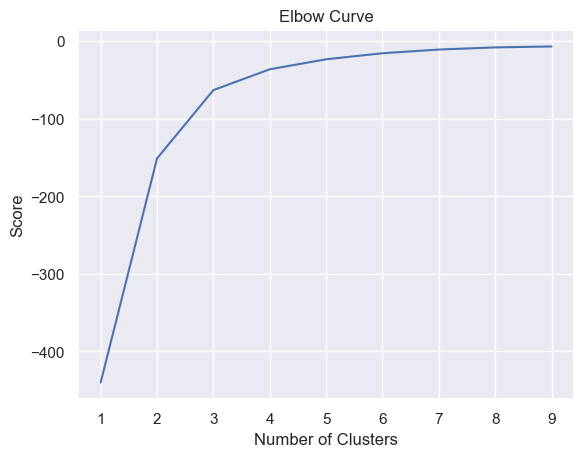

In [126]:
# Produce Elbow Curve
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df2[['latitude']]
X_axis = df2[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualise
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

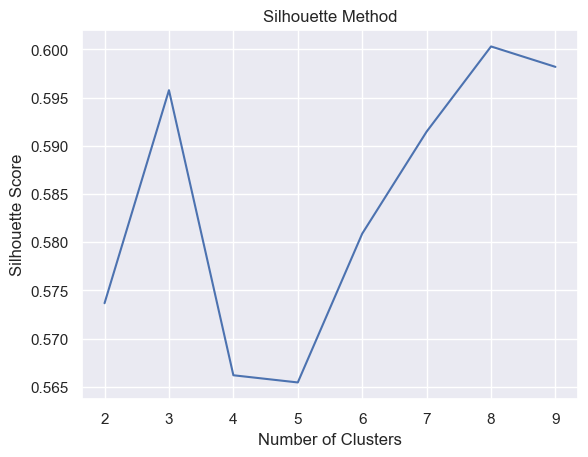

In [127]:
# Use the Silhouette method 

sil = []
K_clusters = range(2,10)

for k in K_clusters:
  kmeans = KMeans(n_clusters = k).fit(Y_axis)
  labels = kmeans.labels_
  sil.append(silhouette_score(Y_axis, labels, metric = 'euclidean'))

plt.plot(K_clusters, sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [128]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,id,latitude,longitude,cluster_label
0,766,52.496759,-2.173682,0
1,1934,51.767526,-1.582311,1
2,597,52.424186,-1.562449,2
3,2915,52.765303,-1.911238,0
4,1664,52.006042,-0.726102,1
5,1820,52.964498,-1.213406,2
6,1029,51.880284,-1.875728,0
7,1029,51.880284,-1.875728,0
8,1473,52.677164,-1.020786,2
9,584,52.347041,-1.366452,2


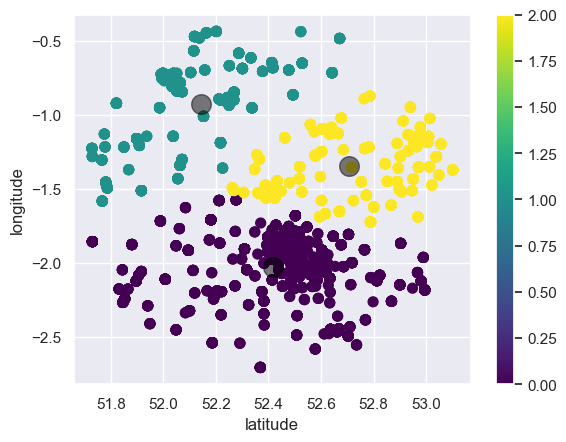

In [129]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [130]:
#Remove Longitute and Latitude from X 
X = X[['id','cluster_label']]
X.head(5)

,id,cluster_label
0,766,0
1,1934,1
2,597,2
3,2915,0
4,1664,1


In [131]:
# Join X and df2 to create a singular dataframe
clustered_data = df2.merge(X, left_on='id', right_on='id')
clustered_data.head(10)

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,id,outcode,latitude,longitude,cluster_label
0,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
1,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
2,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
3,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
4,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
5,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
6,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
7,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
8,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0
9,DY6,26.84,MFS,34.46,110.0,0.225,0.2,18/04/2023,766,DY6,52.496759,-2.173682,0


In [132]:
unique_cluster_labels = clustered_data['cluster_label'].unique()
print(unique_cluster_labels)


[0 1 2]


In [133]:
#Sensecheck the clusters 

cluster_0 = clustered_data[clustered_data['cluster_label'] == 0]

print(cluster_0)


      outward_code_x  distance     Courier  DeliveryCost  Weight_per_line  \
0                DY6     26.84         MFS         34.46           110.00   
1                DY6     26.84         MFS         34.46           110.00   
2                DY6     26.84         MFS         34.46           110.00   
3                DY6     26.84         MFS         34.46           110.00   
4                DY6     26.84         MFS         34.46           110.00   
...              ...       ...         ...           ...              ...   
82500            B15     16.23  DX Express          6.80             4.86   
82501            WV7     34.22  DX Express          8.04            23.80   
82502            WV7     34.22  DX Express          8.04            23.80   
82503            WV7     34.22  DX Freight         10.92            18.90   
82504            WV7     34.22  DX Freight         10.92            18.90   

       Volume_per_line_m3  Pallet_per_line   OrderDate    id outcode  \
0  

In [134]:
cluster_1 = clustered_data[clustered_data['cluster_label'] == 1]

print(cluster_1)


      outward_code_x  distance     Courier  DeliveryCost  Weight_per_line  \
121             OX18     43.04  DX Freight         14.77            29.24   
122             OX18     43.04  DX Freight         14.77            29.24   
123             OX18     43.04  DX Freight         14.77            29.24   
124             OX18     43.04  DX Freight         14.77            29.24   
125             OX18     43.04  DX Freight         14.77            29.24   
...              ...       ...         ...           ...              ...   
82469           MK15     42.67         MFS         42.65           363.00   
82470           MK15     42.67         MFS         42.65           363.00   
82471           MK15     42.67         MFS         42.65           406.56   
82472           MK15     42.67         MFS         42.65           406.56   
82473           MK15     42.67         MFS         42.65           406.56   

       Volume_per_line_m3  Pallet_per_line   OrderDate    id outcode  \
121

In [135]:
cluster_2 = clustered_data[clustered_data['cluster_label'] == 2]

print(cluster_2)


      outward_code_x  distance     Courier  DeliveryCost  Weight_per_line  \
317              CV5      2.34  DX Freight         14.45            28.50   
318              CV5      2.34  DX Freight         14.45            28.50   
319              CV5      2.34  DX Freight         14.45            28.50   
320              CV5      2.34  DX Freight         14.45            28.50   
321              CV5      2.34  DX Freight         14.45            28.50   
...              ...       ...         ...           ...              ...   
82387           CV12      7.58  DX Express          6.77             0.92   
82505           LE13     38.17  DX Freight         14.77            29.88   
82506           LE13     38.17  DX Freight         14.77            29.88   
82507           LE13     38.17  DX Freight         11.02            12.60   
82508           LE13     38.17  DX Freight         11.02            12.60   

       Volume_per_line_m3  Pallet_per_line   OrderDate    id outcode  \
317